In [ ]:
pip install pandas scikit-learn


In [ ]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = [f'feature_{i}' for i in range(1, 58)] + ['spam']
data = pd.read_csv(url, header=None, names=column_names)

# Inspect the data
print(data.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       0.00       0.64       0.64        0.0       0.32       0.00   
1       0.21       0.28       0.50        0.0       0.14       0.28   
2       0.06       0.00       0.71        0.0       1.23       0.19   
3       0.00       0.00       0.00        0.0       0.63       0.00   
4       0.00       0.00       0.00        0.0       0.63       0.00   

   feature_7  feature_8  feature_9  feature_10  ...  feature_49  feature_50  \
0       0.00       0.00       0.00        0.00  ...        0.00       0.000   
1       0.21       0.07       0.00        0.94  ...        0.00       0.132   
2       0.19       0.12       0.64        0.25  ...        0.01       0.143   
3       0.31       0.63       0.31        0.63  ...        0.00       0.137   
4       0.31       0.63       0.31        0.63  ...        0.00       0.135   

   feature_51  feature_52  feature_53  feature_54  feature_55  feature_56  \
0         0.0       0

In [ ]:
from sklearn.model_selection import train_test_split

# Features and labels
X = data.drop('spam', axis=1)
y = data['spam']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Accuracy (no compression): 99.93479678330797
Accuracy (with PCA compression): 99.93479678330797
We compress: 0.19 times


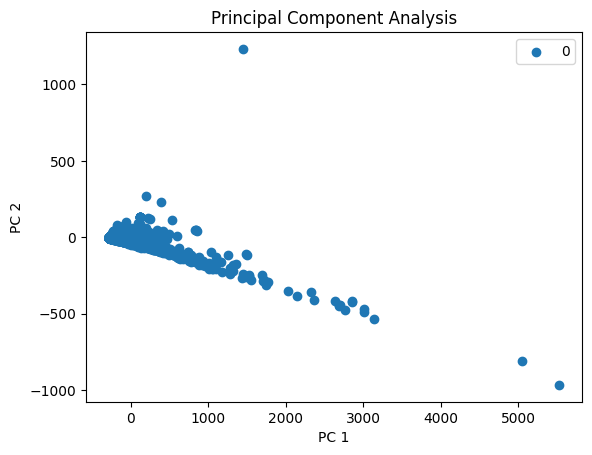

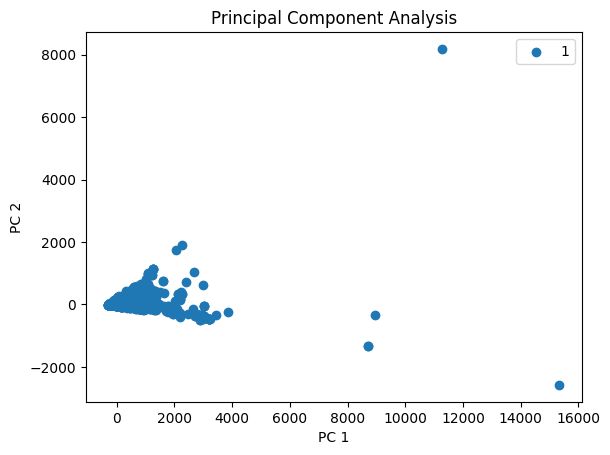

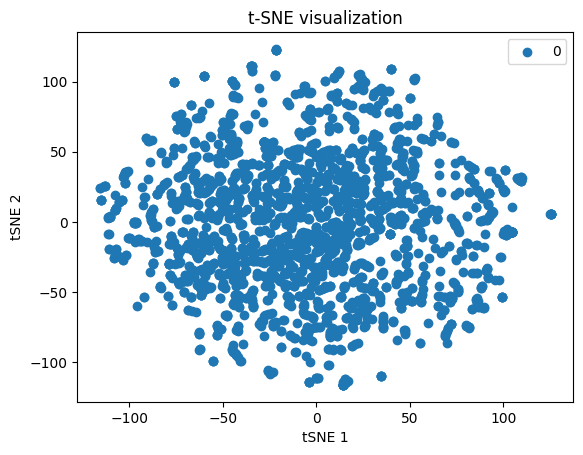

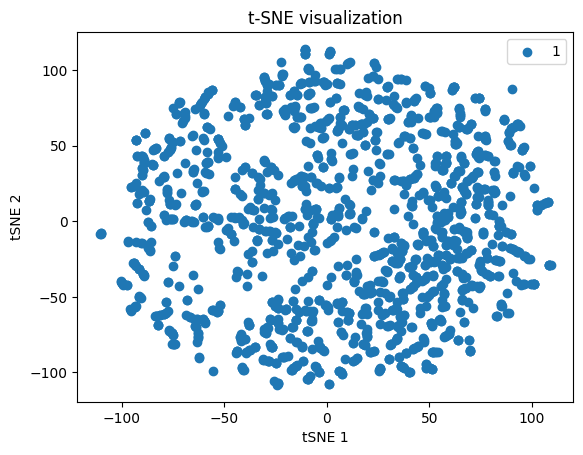

Done


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Build the Logistic Regression model
model = DecisionTreeClassifier(random_state = 0).fit(X, y)
# Prediction
predict = model.predict(X)
# Accuracy
acc = np.mean(predict == y) * 100
print('Accuracy (no compression):', acc)
### Principle Component Analysis (PCA)
# Compute the mean
mu = np.mean(X, axis = 0)
# Subtract the mean to every data point
X_bar = X - mu
# Compute the covariance matrix
cov = np.matmul(X_bar.transpose(), X_bar)
# Eigendecomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov)


# Number of dimensions to keep
k = 300
# Projection matrix
P = eigenvectors[:, :k]
# Project data
X_pca = np.matmul(X_bar, P)
# Build the Logistic Regression model
model_pca = DecisionTreeClassifier(random_state = 0).fit(X_pca, y)
# Prediction
predict_pca = model_pca.predict(X_pca)
# Accuracy with PCA compression / dimensionality reduction
acc = np.mean(predict_pca == y) * 100
print('Accuracy (with PCA compression):', acc)
print('We compress:', X.shape[1] / k, 'times')

# Assuming 'y' contains labels 0 and 1 for spam classification
# Get the unique labels and their count
labels = np.unique(y)
num_labels = len(labels)


# PCA visualization
for l in range(num_labels):
  # Use .iloc for integer-based indexing after boolean mask
  pca1 = X_pca[y == l].iloc[:, 0]  # Select rows with y == l and column 0
  pca2 = X_pca[y == l].iloc[:, 1]  # Select rows with y == l and column 1
  plt.scatter(pca1, pca2, label=labels[l])
  plt.legend()
  plt.title('Principal Component Analysis')
  plt.xlabel('PC 1')
  plt.ylabel('PC 2')
  plt.savefig('PCA.png')
  plt.show()
  plt.clf()

# tSNE visualization
X_tsne = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 3).fit_transform(X_pca.iloc[:, :10])
for l in range(num_labels):
  tsne1 = X_tsne[y == l, 0]
  tsne2 = X_tsne[y == l, 1]
  plt.scatter(tsne1, tsne2, label = labels[l])
  plt.legend()
  plt.title('t-SNE visualization')
  plt.xlabel('tSNE 1')
  plt.ylabel('tSNE 2')
  plt.savefig('tSNE.png')
  plt.show()
print('Done')
